In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys
sys.path.append("../ELPH/")

import ELPH
import ELPH_utils


In [2]:
trajectories = ELPH_utils.load_trajectories(filename='../../trajectories_n_kmax=200.npz')

# trajectories = trajectories[::10]

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)

1000 loaded with n_kmax = 200


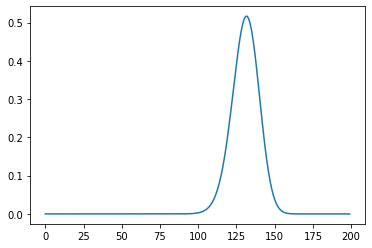

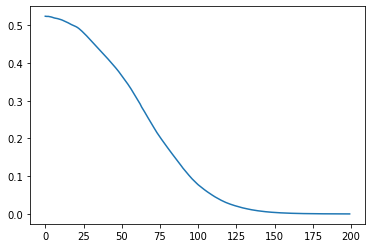

In [3]:
plt.plot(trajectories[1][0])
plt.show()

plt.plot(trajectories[1][-1])
plt.show()

In [4]:
sys.path.append("../utils/")
import fermi_fit

system = ELPH.ELPH(kmax=2.0,n_kmax=n_kmax)

fermi_fitter = fermi_fit.fermi_fit(system.DOS_vec,system.E_el_vec,system.kB)

state density:  0.05990887432794735
qmu 0.04996856033084051 qTemp 403.66003382112496 steps 5
qfermi density:  0.059908874329640364


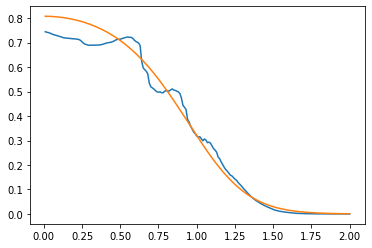

In [5]:

state = trajectories[10][50]

print('state density: ', system.get_electron_density(state))


fermi_fitter.STEP_LIMIT = 100
fermi_fitter.dT = 0.5
fermi_fitter.dmu = 1e-3

fermi_fitter.mstep_max_init = 0.1
fermi_fitter.Tstep_max_init = 100

mu,Temp,steps = fermi_fitter.fit_mu_T(state, 0.1, 300, False)

print('qmu',mu, 'qTemp',Temp,'steps',steps)


qfermi = fermi_fitter.fermi(system.E_el_vec,mu,Temp)

print('qfermi density: ', system.get_electron_density(qfermi))

plt.plot(system.k_vec,state)
plt.plot(system.k_vec,qfermi)
plt.show()


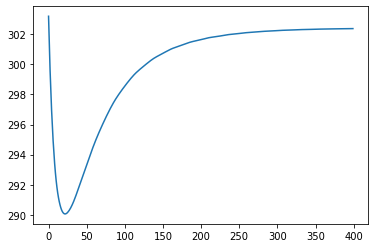

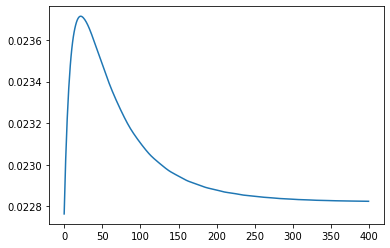

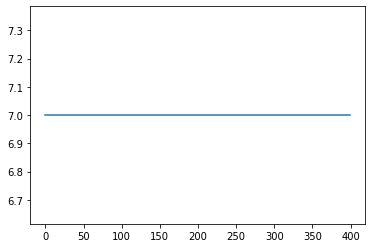

In [9]:
run = trajectories[3]
Temps = []
mus = []
Steps = []


for k in range(run.shape[0]):
    mu,Temp,steps = fermi_fitter.fit_mu_T(run[k], 0.1, 300, False)
    mus.append(mu)
    Temps.append(Temp)
    Steps.append(steps)
    
plt.plot(Temps)
plt.show()

plt.plot(mus)
plt.show()

plt.plot(Steps)
plt.show()

state density:  0.05990887432794736
qmu 0.054391475518723406 steps 13
qfermi density:  0.05990758483737085


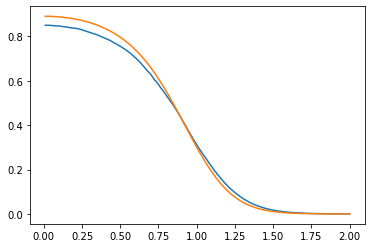

In [56]:
T = 300


state = trajectories[10][300]

print('state density: ', system.get_electron_density(state))

fermi_fitter.MAXERROR = 1e-3

fermi_fitter.STEP_LIMIT = 100
fermi_fitter.dT = 0.5
fermi_fitter.dmu = 1e-3

fermi_fitter.mstep_max_init = 0.1
fermi_fitter.Tstep_max_init = 100

mu,steps = fermi_fitter.fit_mu(state, 0.1, T, False)

print('qmu',mu,'steps',steps)


qfermi = fermi_fitter.fermi(system.E_el_vec,mu,T)

print('qfermi density: ', system.get_electron_density(qfermi))

plt.plot(system.k_vec,state)
plt.plot(system.k_vec,qfermi)
plt.show()